<a href="https://colab.research.google.com/github/divinelof/21120404_dissertation/blob/main/NB1_EcommercePreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SETUP**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Libraries**

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Warnings
import warnings
warnings.filterwarnings('ignore')

# **UTILITIES**

In [ ]:
# Helper function
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# **Loading Dataset**

In [ ]:
# loading Transaction dataset
data_path = '/content/drive/MyDrive/EcommerceFraudDetection/'
transaction = pd.read_csv(f"{data_path}Transactions.csv")
print("Transactions Data shape :", transaction.shape)
transaction = reduce_mem_usage(transaction)
transaction.head()

Transactions Data shape : (590540, 394)
Memory usage of dataframe is 1775.15 MB
Memory usage after optimization is: 487.16 MB
Decreased by 72.6%


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Loading Identity dataset
identity = pd.read_csv(f"{data_path}Identity.csv")
print("Identity Data shape :", identity.shape)
identity = reduce_mem_usage(identity)
identity.head()

Identity Data shape : (144233, 41)
Memory usage of dataframe is 45.12 MB
Memory usage after optimization is: 10.00 MB
Decreased by 77.8%


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
# Merging transaction and identity train data
allData = pd.merge(transaction, identity, how='left')
print("Combined Data shape: ", allData.shape)
len_df = len(allData)
del transaction, identity
allData.head()

Combined Data shape:  (590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [ ]:
# Duplicates check in train data
allData.duplicated().sum()

0

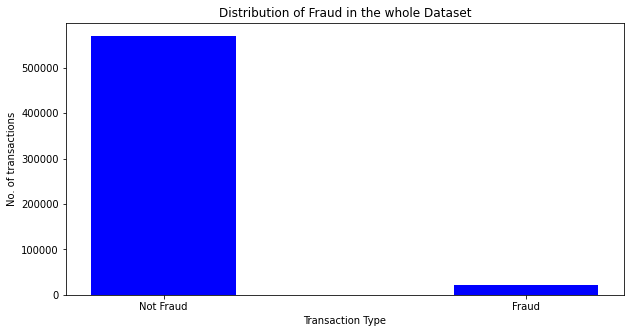

In [ ]:
# creating the dataset
data = allData.isFraud.value_counts().to_dict()
transType = ["Not Fraud", "Fraud"] #Transacton Type
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(transType, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Transaction Type")
plt.ylabel("No. of transactions")
plt.title("Distribution of Fraud in the whole Dataset")
plt.show()

# **Feature Selection**

In [ ]:
usefulFeatures = ['TransactionAmt', 'TransactionDT', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
                   'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
                   'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M2', 'M3',
                   'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V17',
                   'V19', 'V20', 'V29', 'V30', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V44', 'V45', 'V46', 'V47', 'V48',
                   'V49', 'V51', 'V52', 'V53', 'V54', 'V56', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71',
                   'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92',
                   'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140',
                   'V143', 'V145', 'V146', 'V147', 'V149', 'V150', 'V151', 'V152', 'V154', 'V156', 'V158', 'V159', 'V160', 'V161',
                   'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V169', 'V170', 'V171', 'V172', 'V173', 'V175', 'V176', 'V177',
                   'V178', 'V180', 'V182', 'V184', 'V187', 'V188', 'V189', 'V195', 'V197', 'V200', 'V201', 'V202', 'V203', 'V204',
                   'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V219', 'V220',
                   'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V231', 'V233', 'V234', 'V238', 'V239',
                   'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V249', 'V251', 'V253', 'V256', 'V257', 'V258', 'V259', 'V261',
                   'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276',
                   'V277', 'V278', 'V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291', 'V292', 'V294', 'V303',
                   'V304', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V317', 'V322', 'V323', 'V324', 'V326',
                   'V329', 'V331', 'V332', 'V333', 'V335', 'V336', 'V338', 'id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09',
                   'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_17', 'id_19', 'id_20', 'id_30', 'id_31', 'id_32', 'id_33',
                   'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'isFraud']

In [ ]:
allData = allData[usefulFeatures]
print("Selected Features", allData.shape)
allData.head()

Selected Features (590540, 281)


,TransactionAmt,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_30,id_31,id_32,id_33,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,68.5,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,29.0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,59.0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,50.0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,50.0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,Android 7.0,samsung browser 6.2,32.0,2220x1080,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0


# **Missing Value check**

In [ ]:
# Dropping columns with more than 50% missing values 
missingValueRatio = allData.isnull().sum()/len(allData)
allData = allData.drop(columns= missingValueRatio[missingValueRatio > 0.5].index)
print("Selected Features 2", allData.shape)
allData.head()

Selected Features 2 (590540, 131)


,TransactionAmt,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V306,V307,V308,V310,V312,V313,V314,V315,V317,isFraud
0,68.5,86400,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0
1,29.0,86401,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,59.0,86469,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,86499,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,50.0,1758.0,925.0,354.0,135.0,0.0,0.0,0.0,1404.0,0
4,50.0,86506,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


We are left with 131 columns out of 434 after removing features with more than 50% missing values. Let us now fill all the missing values. For numerical columns, we will use median value and for categorical column, we will use the most frequent category to fill the missing values.

In [ ]:
print(f'Total missing values before imputing: {allData.isnull().sum().sum()}')

# Filtering numerical data
numerical_df = allData.select_dtypes(include=np.number)
print("Numerical Data Shape: ", numerical_df.shape)

# Filtering categorical data
categorical_df = allData.select_dtypes(exclude=np.number)
print("Categorical Data Shape: ",categorical_df.shape)
del allData

# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df = pd.DataFrame(imp_median.fit_transform(numerical_df), columns=numerical_df.columns)
del numerical_df

# Filling missing values by most frequent value for categorical columns
imp_max = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_df = pd.DataFrame(imp_max.fit_transform(categorical_df), columns=categorical_df.columns)
del categorical_df

# Concatinating numerical and categorical data
allData_cleaned = pd.concat([num_df, cat_df], axis=1)
del num_df, cat_df

# Verifying missing values
print(f'Total missing values after imputing: {allData_cleaned.isnull().sum().sum()}')
allData_cleaned.head()

Total missing values before imputing: 10373101
Numerical Data Shape:  (590540, 123)
Categorical Data Shape:  (590540, 8)
Total missing values after imputing: 0


,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V317,isFraud,ProductCD,card4,card6,P_emaildomain,M2,M3,M4,M6
0,68.5,86400.0,13926.0,361.0,150.0,142.0,315.0,87.0,1.0,1.0,...,117.0,0.0,W,discover,credit,gmail.com,T,T,M2,T
1,29.0,86401.0,2755.0,404.0,150.0,102.0,325.0,87.0,1.0,1.0,...,0.0,0.0,W,mastercard,credit,gmail.com,T,T,M0,T
2,59.0,86469.0,4663.0,490.0,150.0,166.0,330.0,87.0,1.0,1.0,...,0.0,0.0,W,visa,debit,outlook.com,T,T,M0,F
3,50.0,86499.0,18132.0,567.0,150.0,117.0,476.0,87.0,2.0,5.0,...,1404.0,0.0,W,mastercard,debit,yahoo.com,T,T,M0,F
4,50.0,86506.0,4497.0,514.0,150.0,102.0,420.0,87.0,1.0,1.0,...,0.0,0.0,H,mastercard,credit,gmail.com,T,T,M0,F


# **Splitting Dataset**

In [ ]:
train_idx, valid_idx = train_test_split(range(len(allData_cleaned)), test_size=0.2, random_state=1, stratify=allData_cleaned.isFraud)

In [ ]:
train = allData_cleaned.iloc[train_idx, :]
validation = allData_cleaned.iloc[valid_idx, :]

print("Training data shape :", train.shape)
print("Validation data shape :", validation.shape)

Training data shape : (472432, 131)
Validation data shape : (118108, 131)


In [ ]:
train.isFraud.value_counts()

0.0    455902
1.0     16530
Name: isFraud, dtype: int64

In [ ]:
validation.isFraud.value_counts()

0.0    113975
1.0      4133
Name: isFraud, dtype: int64

# **Saving the cleaned Dataset**

In [ ]:
train.to_csv(f"{data_path}Train.csv", index = False)
validation.to_csv(f"{data_path}Validation.csv", index = False)

# **Exploration**

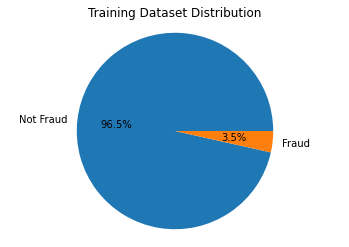

In [ ]:
# Class imbalance check
plt.pie(train.isFraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')
plt.title("Training Dataset Distribution")
plt.axis('equal')
plt.show()

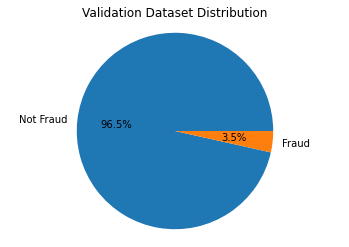

In [ ]:
# Class imbalance check
plt.pie(validation.isFraud.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%0.1f%%')
plt.title("Validation Dataset Distribution")
plt.axis('equal')
plt.show()

In [ ]:
validation.head()

,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V317,isFraud,ProductCD,card4,card6,P_emaildomain,M2,M3,M4,M6
203495,29.546875,4655781.0,6107.0,467.0,150.0,226.0,158.0,87.0,4.0,2.0,...,0.000000,0.0,W,visa,debit,gmail.com,T,T,M0,F
227933,57.937500,5407987.0,1675.0,174.0,150.0,226.0,330.0,87.0,165.0,151.0,...,107.949997,0.0,W,visa,debit,gmail.com,T,T,M0,F
262769,70.000000,6314603.0,16075.0,514.0,150.0,102.0,330.0,87.0,1.0,1.0,...,70.000000,0.0,H,mastercard,credit,gmail.com,T,T,M0,F
388075,59.000000,9740016.0,15063.0,514.0,150.0,226.0,181.0,87.0,3.0,2.0,...,0.000000,0.0,W,visa,credit,comcast.net,T,T,M1,F
46351,100.000000,1108426.0,12156.0,555.0,117.0,224.0,296.0,32.0,1.0,1.0,...,0.000000,0.0,H,mastercard,credit,anonymous.com,T,T,M0,F


(0.0, 900.0)

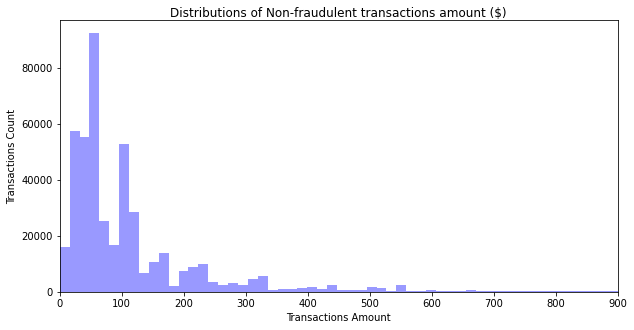

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(train["TransactionAmt"][train["isFraud"].eq(0)], kde = False, bins = 2000, color = "blue")
plt.title("Distributions of Non-fraudulent transactions amount ($)",fontweight=10, 
          pad='2.0')
plt.xlabel("Transactions Amount",fontweight=10)
plt.ylabel("Transactions Count",fontweight=10)
plt.xlim([0, 900])

(0.0, 900.0)

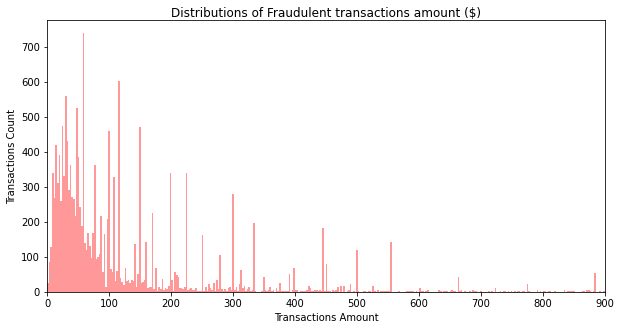

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(train["TransactionAmt"][train["isFraud"].eq(1)], kde = False, bins = 2000, color = "red")
plt.title("Distributions of Fraudulent transactions amount ($)",fontweight=10, 
          pad='2.0')
plt.xlabel("Transactions Amount",fontweight=10)
plt.ylabel("Transactions Count",fontweight=10)
plt.xlim([0, 900])

Text(0, 0.5, 'Transactions Count')

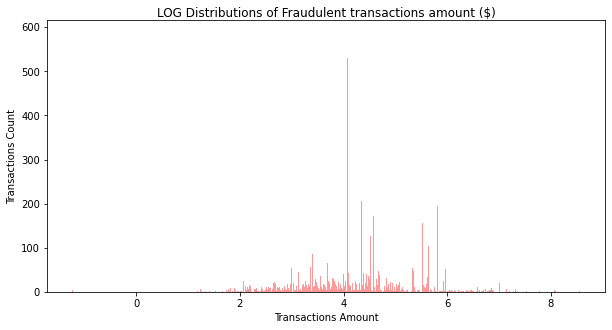

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(np.log(train["TransactionAmt"][train["isFraud"].eq(1)]), kde = False, bins = 2000, color = "red")
plt.title("LOG Distributions of Fraudulent transactions amount ($)",fontweight=10, 
          pad='2.0')
plt.xlabel("Transactions Amount",fontweight=10)
plt.ylabel("Transactions Count",fontweight=10)


Text(0, 0.5, 'Transactions Count')

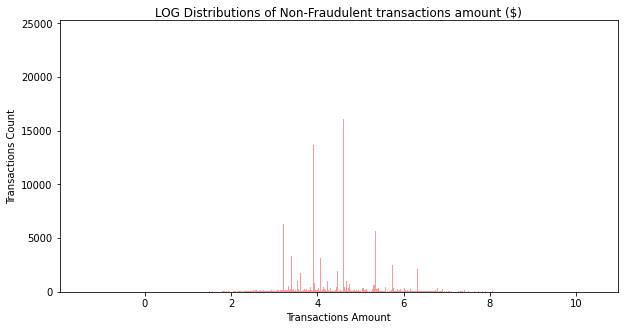

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(np.log(train["TransactionAmt"][train["isFraud"].eq(0)]), kde = False, bins = 2000, color = "red")
plt.title("LOG Distributions of Non-Fraudulent transactions amount ($)",fontweight=10, 
          pad='2.0')
plt.xlabel("Transactions Amount",fontweight=10)
plt.ylabel("Transactions Count",fontweight=10)


In [ ]:
train["TransactionAmt"].min(), train["TransactionAmt"].max()

(0.2509765625, 31936.0)

In [ ]:
def binAmount(amount):

  if amount > 0 and amount <= 200:
    return "0-200"
  elif amount > 200 and amount <= 400:
    return "201-400"
  elif amount > 401 and amount <= 600:
    return "401-600"
  elif amount > 601 and amount <= 800:
    return "601-800"
  elif amount > 801 and amount <= 1000:
    return "801-1000"
  elif amount > 1000:
    return "> 1000"

In [ ]:
train["TransactionRange"] = train["TransactionAmt"].map(binAmount)

(0.0, 50000.0)

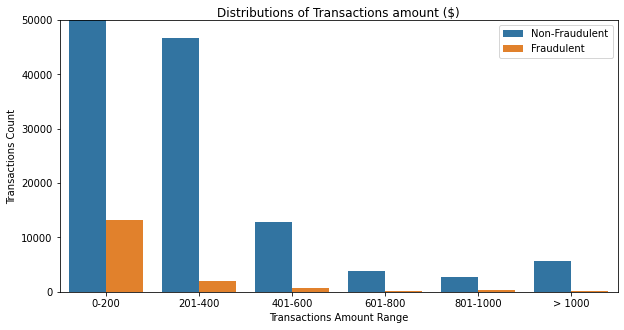

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x ="TransactionRange" , data = train,  hue = "isFraud",
              order = ["0-200", "201-400", "401-600", "601-800", "801-1000", "> 1000"])
plt.title("Distributions of Transactions amount ($)",fontweight=10, 
          pad='2.0')
plt.xlabel("Transactions Amount Range",fontweight=10)
plt.ylabel("Transactions Count",fontweight=10)
plt.legend(["Non-Fraudulent", "Fraudulent"])
plt.ylim([0, 50000])

In [ ]:
pd.pivot_table(train, values='TransactionAmt', index=["TransactionRange"],
                    columns=["isFraud"], aggfunc=np.count_nonzero, fill_value=0)

isFraud,0.0,1.0
TransactionRange,,
0-200,384262,13234
201-400,46616,1945
401-600,12821,740
601-800,3864,159
801-1000,2656,315
> 1000,5629,135


In [ ]:
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
dates_range = pd.date_range(start='2017-10-01', end='2019-01-01')
us_holidays = calendar().holidays(start=dates_range.min(), end=dates_range.max())

def add_time_features_2(df, new_columns=[]):
    # Temporary variables for aggregation
    START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')
    df['DT'] = df['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
    df['DT_M'] = ( df['DT'].dt.month).astype(np.int8) #((df['DT'].dt.year-2017)*12 + df['DT'].dt.month).astype(np.int8)
    df['DT_W'] = ((df['DT'].dt.year-2017)*52 + df['DT'].dt.weekofyear).astype(np.int8)
    df['DT_D'] = ((df['DT'].dt.year-2017)*365 + df['DT'].dt.dayofyear).astype(np.int16)
    df['DT_Y'] = df['DT'].dt.year
    
    df['DT_hour'] = (df['DT'].dt.hour).astype(np.int8)
    df['DT_day_week'] = (df['DT'].dt.dayofweek).astype(np.int8)
    df['DT_day_month'] = (df['DT'].dt.day).astype(np.int8)
        
    # Possible solo feature
    df['is_december'] = df['DT'].dt.month
    df['is_december'] = (df['is_december']==12).astype(np.int8)

    # Holidays
    df['is_holiday'] = (df['DT'].dt.date.astype('datetime64').isin(us_holidays)).astype(np.int8)
    
    new_columns += ['DT',"DT_Y", 'DT_M', 'DT_W', 'DT_D', 'DT_hour', 'DT_day_week', 'DT_day_month', 'is_december', 'is_holiday']
    return df

In [ ]:
dataFeat = add_time_features_2(train)

In [ ]:
dataFeat[['DT',"DT_Y" ,'DT_M', 'DT_hour', 'DT_day_week', 'is_december', 'is_holiday', 'TransactionAmt']].head()

,DT,DT_Y,DT_M,DT_hour,DT_day_week,is_december,is_holiday,TransactionAmt
22401,2017-12-06 18:30:18,2017,12,18,2,1,0,54.500
257693,2018-02-09 15:36:00,2018,2,15,4,0,0,49.000
354272,2018-03-11 04:23:32,2018,3,4,6,0,0,76.125
206016,2018-01-23 19:49:19,2018,1,19,1,0,0,323.000
590129,2018-05-31 21:36:54,2018,5,21,3,0,0,34.000


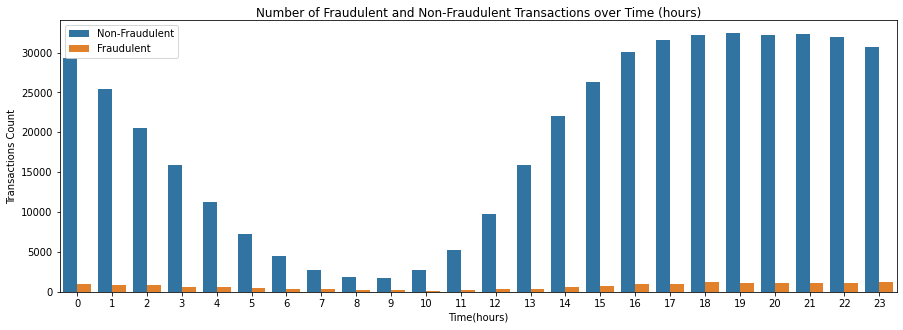

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x ="DT_hour" , data = dataFeat,  hue = "isFraud")
plt.title("Number of Fraudulent and Non-Fraudulent Transactions over Time (hours)",fontweight=10, 
          pad='2.0')
plt.ylabel("Transactions Count",fontweight=10)
plt.xlabel("Time(hours)",fontweight=10)
plt.legend(["Non-Fraudulent", "Fraudulent"], loc = "upper left")


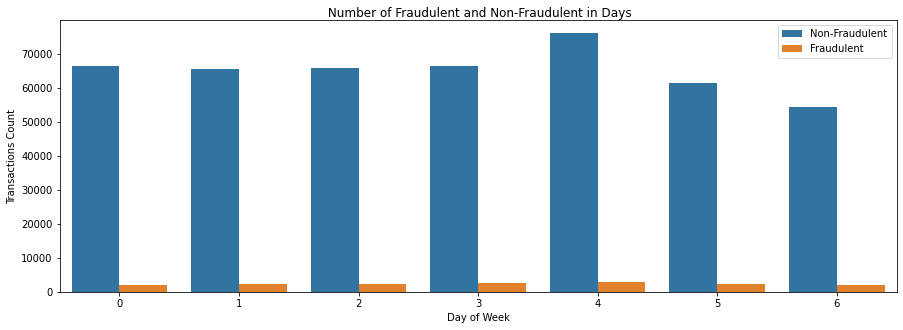

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x ="DT_day_week" , data = dataFeat,  hue = "isFraud")
plt.title(" Number of Fraudulent and Non-Fraudulent in Days",fontweight=10, 
          pad='2.0')
plt.ylabel("Transactions Count",fontweight=10)
plt.xlabel("Day of Week",fontweight=10)
plt.legend(["Non-Fraudulent", "Fraudulent"])


In [ ]:
dataFeat.columns[100:150]

Index(['V279', 'V280', 'V282', 'V283', 'V285', 'V287', 'V288', 'V289', 'V291',
       'V292', 'V294', 'V303', 'V304', 'V306', 'V307', 'V308', 'V310', 'V312',
       'V313', 'V314', 'V315', 'V317', 'isFraud', 'ProductCD', 'card4',
       'card6', 'P_emaildomain', 'M2', 'M3', 'M4', 'M6', 'TransactionRange',
       'DT', 'DT_M', 'DT_W', 'DT_D', 'DT_hour', 'DT_day_week', 'DT_day_month',
       'is_december', 'is_holiday'],
      dtype='object')

In [ ]:
dataFeat[[ 'M2', 'M3', 'M4', 'M6']]

,M2,M3,M4,M6
22401,T,T,M0,F
257693,T,T,M0,T
354272,T,T,M0,F
206016,T,T,M0,F
590129,T,T,M1,F
...,...,...,...,...
88134,T,T,M0,F
528380,T,T,M0,T
2519,T,T,M0,F
269718,T,T,M0,F


In [ ]:
train.head()

,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,...,TransactionRange,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday
22401,54.500,585018.0,1974.0,111.0,150.0,226.0,184.0,87.0,1.0,1.0,...,0-200,2017-12-06 18:30:18,12,49,340,18,2,6,1,0
257693,49.000,6190560.0,3484.0,372.0,150.0,117.0,264.0,87.0,1.0,2.0,...,0-200,2018-02-09 15:36:00,14,58,405,15,4,9,0,0
354272,76.125,8742212.0,9300.0,103.0,185.0,138.0,299.0,87.0,1.0,1.0,...,0-200,2018-03-11 04:23:32,15,62,435,4,6,11,0,0
206016,323.000,4736959.0,7638.0,174.0,150.0,166.0,123.0,87.0,1.0,1.0,...,201-400,2018-01-23 19:49:19,13,56,388,19,1,23,0,0
590129,34.000,15802614.0,17926.0,124.0,150.0,226.0,269.0,87.0,2.0,1.0,...,0-200,2018-05-31 21:36:54,17,74,516,21,3,31,0,0


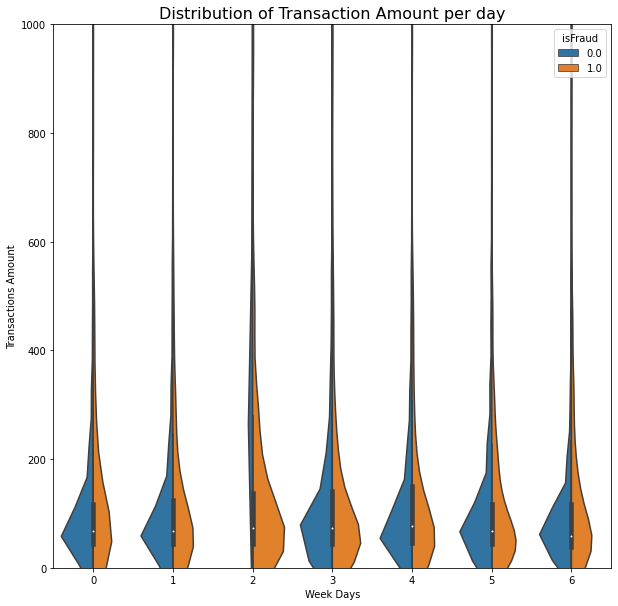

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.violinplot(x="DT_day_week", y="TransactionAmt", hue="isFraud", split=True, data=train)
ax.set_title('Distribution of Transaction Amount per day', fontsize=16)

plt.ylabel("Transactions Amount",fontweight=10)
plt.xlabel("Week Days",fontweight=10)
#plt.legend(["Non-Fraudulent", "Fraudulent"])

plt.ylim([0, 1000])
plt.show()

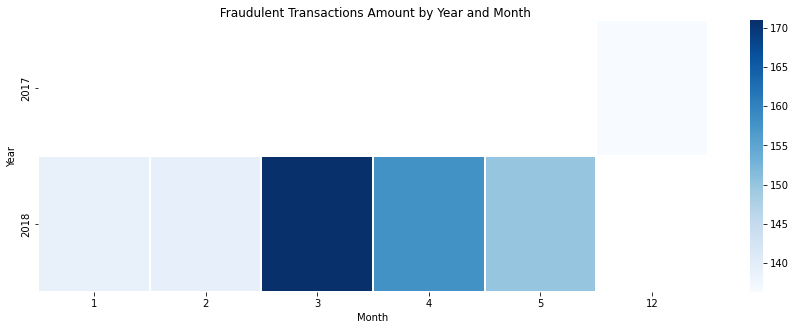

In [ ]:
tempDF = train[train["isFraud"].eq(1)].pivot_table(index = "DT_Y", columns = "DT_M", values = "TransactionAmt")

plt.figure(figsize = (15,5))
sns.heatmap(tempDF,  cmap = "Blues", linecolor = "white", linewidth = 1)
plt.ylabel("Year",fontweight=10)
plt.xlabel("Month",fontweight=10)
plt.title(" Fraudulent Transactions Amount by Year and Month",fontweight=10, 
          pad='2.0')
plt.show()

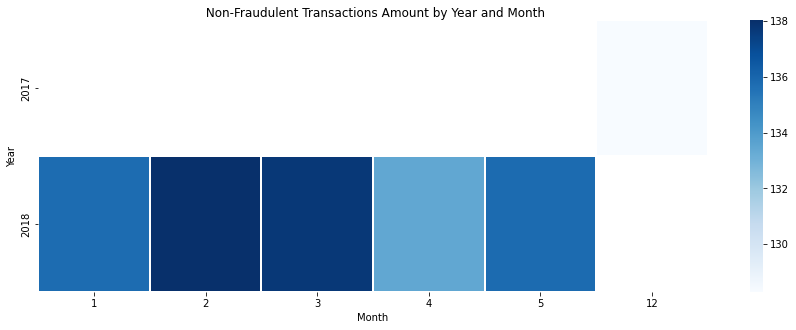

In [ ]:
tempDF = train[train["isFraud"].eq(0)].pivot_table(index = "DT_Y", columns = "DT_M", values = "TransactionAmt")
plt.figure(figsize = (15,5))
sns.heatmap(tempDF,  cmap = "Blues", linecolor = "white", linewidth = 1)
plt.ylabel("Year",fontweight=10)
plt.xlabel("Month",fontweight=10)
plt.title(" Non-Fraudulent Transactions Amount by Year and Month",fontweight=10, 
          pad='2.0')
plt.show()

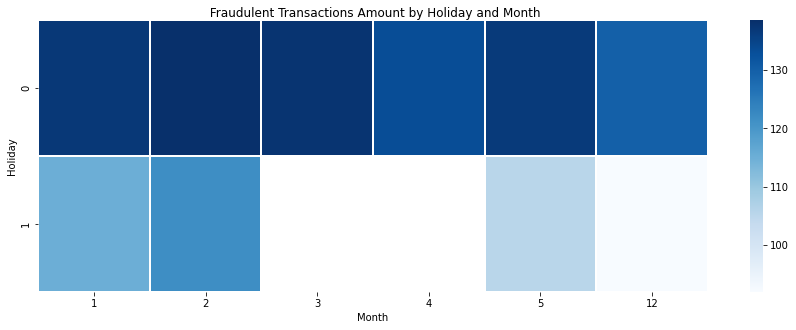

In [ ]:
tempDF = train[train["isFraud"].eq(0)].pivot_table(index = "is_holiday", columns = "DT_M", values = "TransactionAmt")
plt.figure(figsize = (15,5))
sns.heatmap(tempDF,  cmap = "Blues", linecolor = "white", linewidth = 1)
plt.ylabel("Holiday",fontweight=10)
plt.xlabel("Month",fontweight=10)
plt.title(" Fraudulent Transactions Amount by Holiday and Month",fontweight=10, 
          pad='2.0')
plt.show()

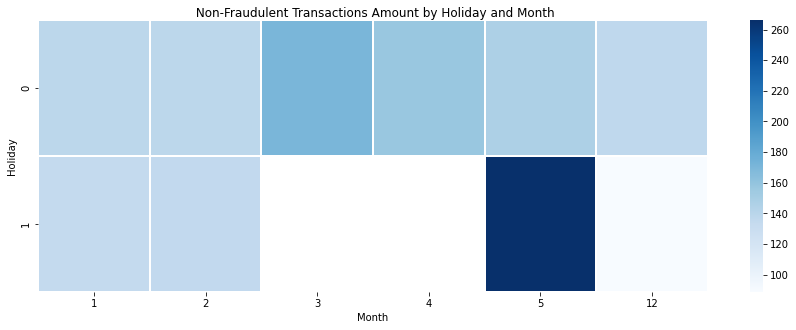

In [ ]:
tempDF = train[train["isFraud"].eq(1)].pivot_table(index = "is_holiday", columns = "DT_M", values = "TransactionAmt")
plt.figure(figsize = (15,5))
sns.heatmap(tempDF,  cmap = "Blues", linecolor = "white", linewidth = 1)
plt.ylabel("Holiday",fontweight=10)
plt.xlabel("Month",fontweight=10)
plt.title(" Non-Fraudulent Transactions Amount by Holiday and Month",fontweight=10, 
          pad='2.0')
plt.show()

In [ ]:
train.head()

,TransactionAmt,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,...,TransactionRange,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday
22401,54.500,585018.0,1974.0,111.0,150.0,226.0,184.0,87.0,1.0,1.0,...,0-200,2017-12-06 18:30:18,12,49,340,18,2,6,1,0
257693,49.000,6190560.0,3484.0,372.0,150.0,117.0,264.0,87.0,1.0,2.0,...,0-200,2018-02-09 15:36:00,14,58,405,15,4,9,0,0
354272,76.125,8742212.0,9300.0,103.0,185.0,138.0,299.0,87.0,1.0,1.0,...,0-200,2018-03-11 04:23:32,15,62,435,4,6,11,0,0
206016,323.000,4736959.0,7638.0,174.0,150.0,166.0,123.0,87.0,1.0,1.0,...,201-400,2018-01-23 19:49:19,13,56,388,19,1,23,0,0
590129,34.000,15802614.0,17926.0,124.0,150.0,226.0,269.0,87.0,2.0,1.0,...,0-200,2018-05-31 21:36:54,17,74,516,21,3,31,0,0
